In [6]:
import json
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

In [7]:

def plot_patient_and_depot_locations(json_file):
    with open(json_file, 'r') as file:
        data = json.load(file)

    num_routes = len(data['routes'])

    plt.figure(figsize=(10, 8))

    colormap = cm.get_cmap('tab20', num_routes)

    for index, route in enumerate(data['routes']):
        
        x_coords = [route['depot']['x_coord']]
        y_coords = [route['depot']['y_coord']]

        for patient in route['patients']:
            x_coords.append(patient['x_coord'])
            y_coords.append(patient['y_coord'])

        x_coords.append(route['depot']['x_coord'])
        y_coords.append(route['depot']['y_coord'])

        color = colormap(index % num_routes) # Use modulo to cycle through colors if necessary

        plt.plot(x_coords, y_coords, marker='s', linestyle='-',
                 color=color, label=f'Route {index+1}')

    depot_x = data['routes'][0]['depot']['x_coord']
    depot_y = data['routes'][0]['depot']['y_coord']
    
    
    plt.scatter(depot_x, depot_y, c='black', marker='o', s=150, label='Depot')

    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Patient Locations with Depot')

    plt.show()

/var/folders/h4/_4wngf5n4793mylk022tqrrh0000gn/T/ipykernel_90863/4230736084.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('tab20', num_routes)


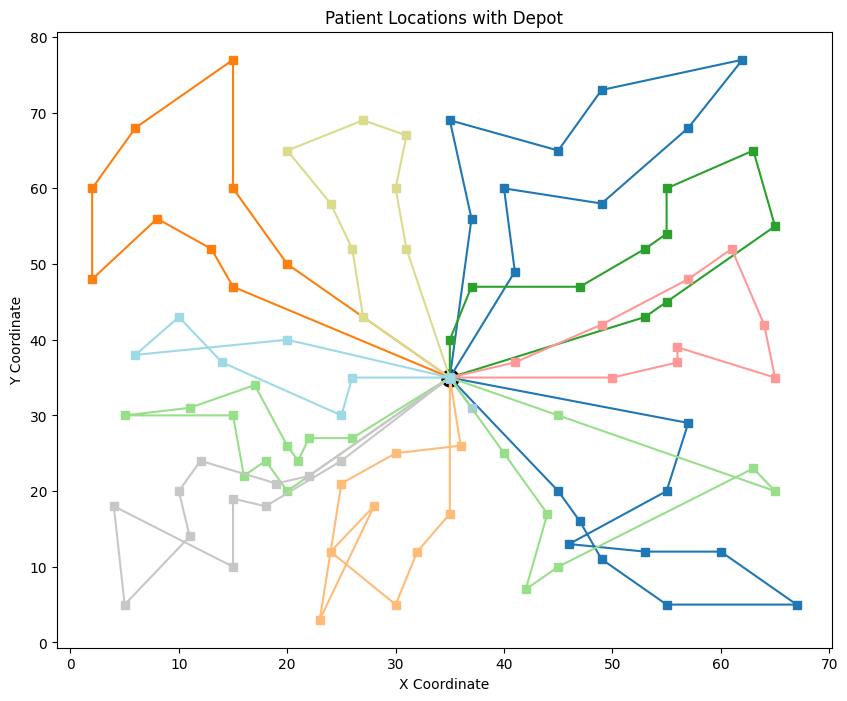

In [8]:
json_file = 'Individual.json'
plot_patient_and_depot_locations(json_file)

In [9]:
def plot_patient_and_depot_locations_all_routes(json_file, highlighted_route_index):
    with open(json_file, 'r') as file:
        data = json.load(file)

    highlighted_route_index -= 1  

    num_routes = len(data['routes'])
    plt.figure(figsize=(10, 8))

    other_colormap = cm.get_cmap('Greys', num_routes)

    for index, route in enumerate(data['routes']):
        x_coords = [route['depot']['x_coord']]
        y_coords = [route['depot']['y_coord']]

        for patient in route['patients']:
            x_coords.append(patient['x_coord'])
            y_coords.append(patient['y_coord'])

        x_coords.append(route['depot']['x_coord'])
        y_coords.append(route['depot']['y_coord'])

        if index == highlighted_route_index:
            continue  

        plt.plot(x_coords, y_coords, marker='o', linestyle='-',
                 color=other_colormap(index % num_routes), alpha=0.3)

    route = data['routes'][highlighted_route_index]
    x_coords = [route['depot']['x_coord']]
    y_coords = [route['depot']['y_coord']]

    for patient in route['patients']:
        x_coords.append(patient['x_coord'])
        y_coords.append(patient['y_coord'])

    x_coords.append(route['depot']['x_coord'])
    y_coords.append(route['depot']['y_coord'])

    plt.plot(x_coords, y_coords, marker='s', linestyle='-', color='tab:red',
             linewidth=2, label=f'Highlighted Route {highlighted_route_index + 1}')

    depot_x = data['routes'][0]['depot']['x_coord']
    depot_y = data['routes'][0]['depot']['y_coord']
    plt.scatter(depot_x, depot_y, c='black', marker='o', s=150, label='Depot')

    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Patient Locations with Highlighted Route')
    plt.legend()

    plt.show()

/var/folders/h4/_4wngf5n4793mylk022tqrrh0000gn/T/ipykernel_90863/1593720598.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  other_colormap = cm.get_cmap('Greys', num_routes)


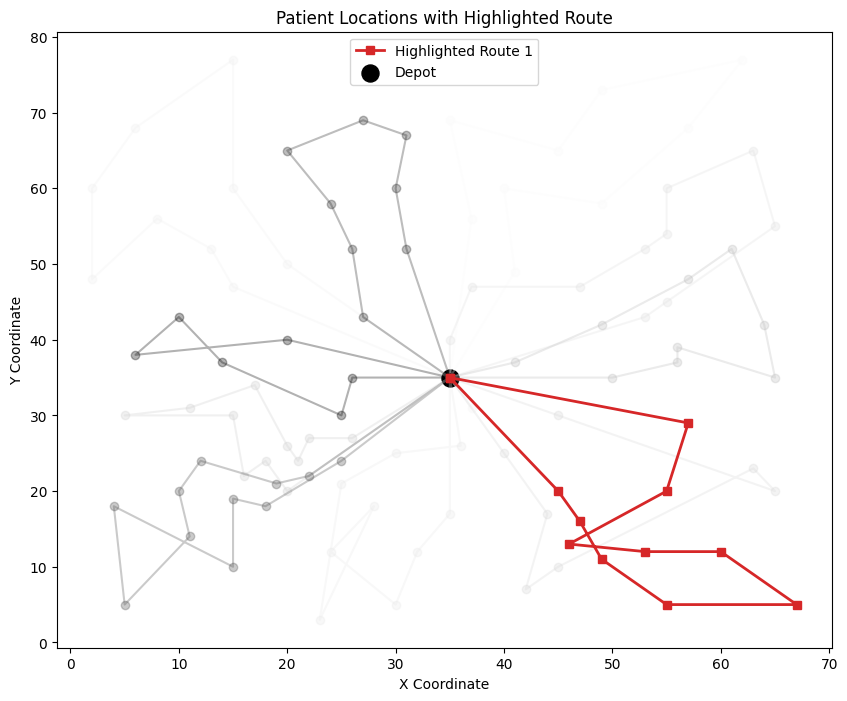

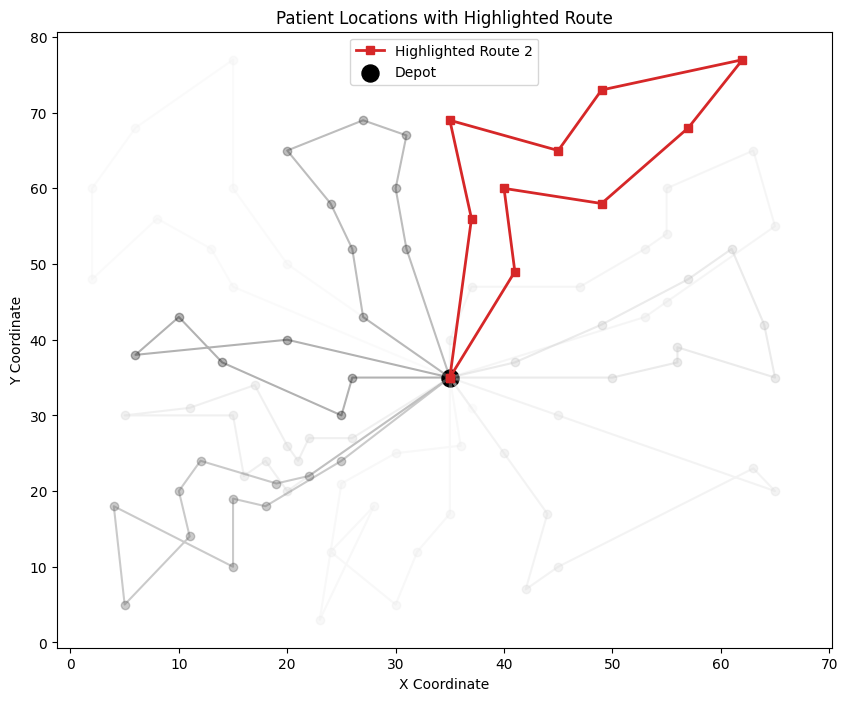

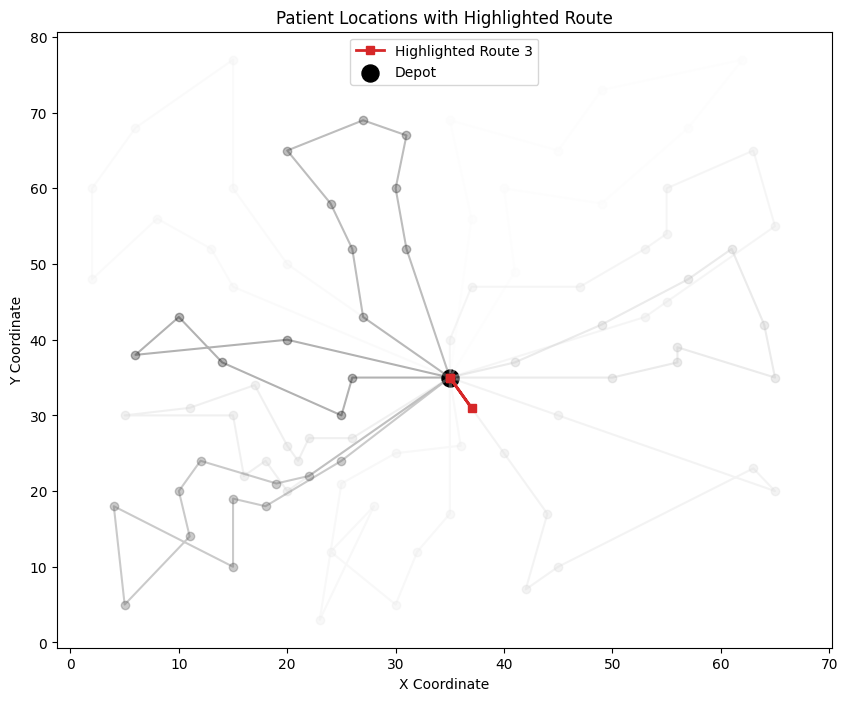

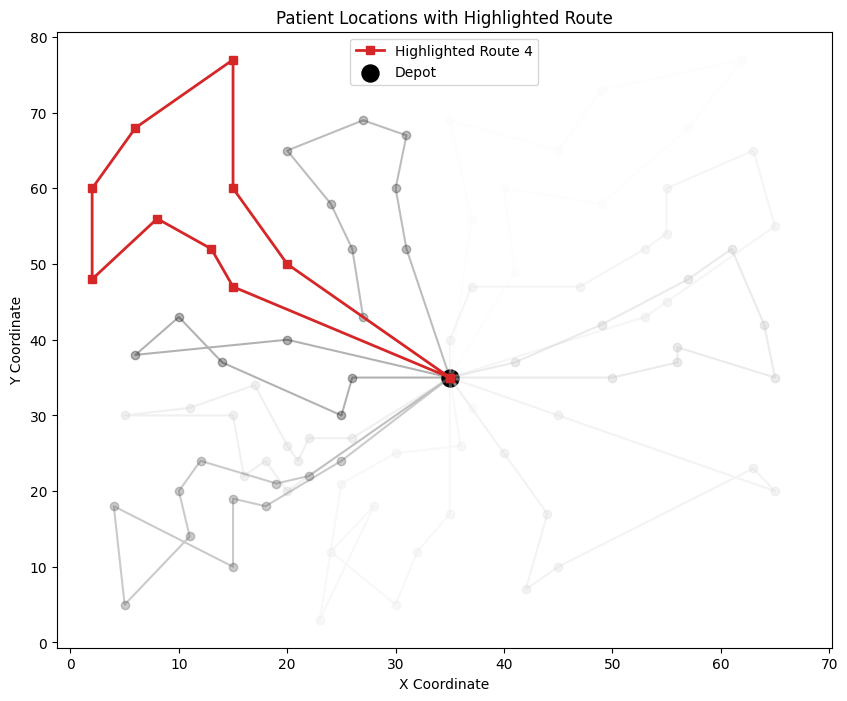

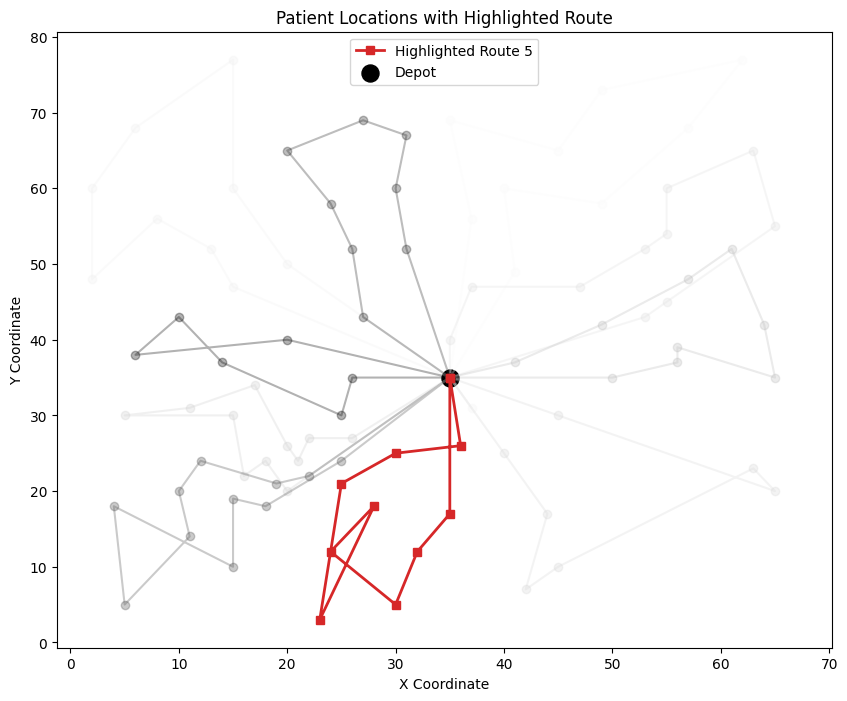

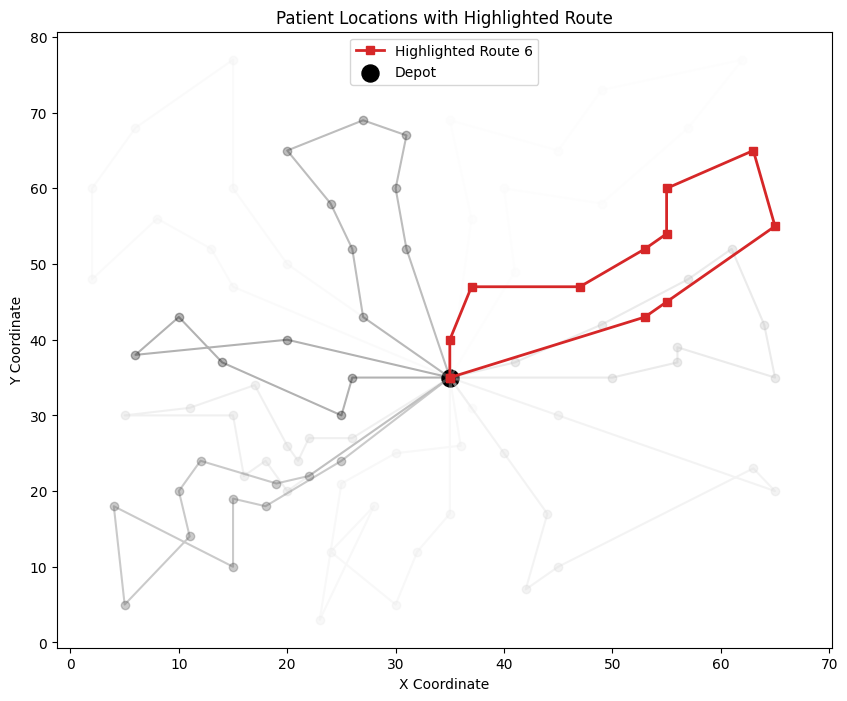

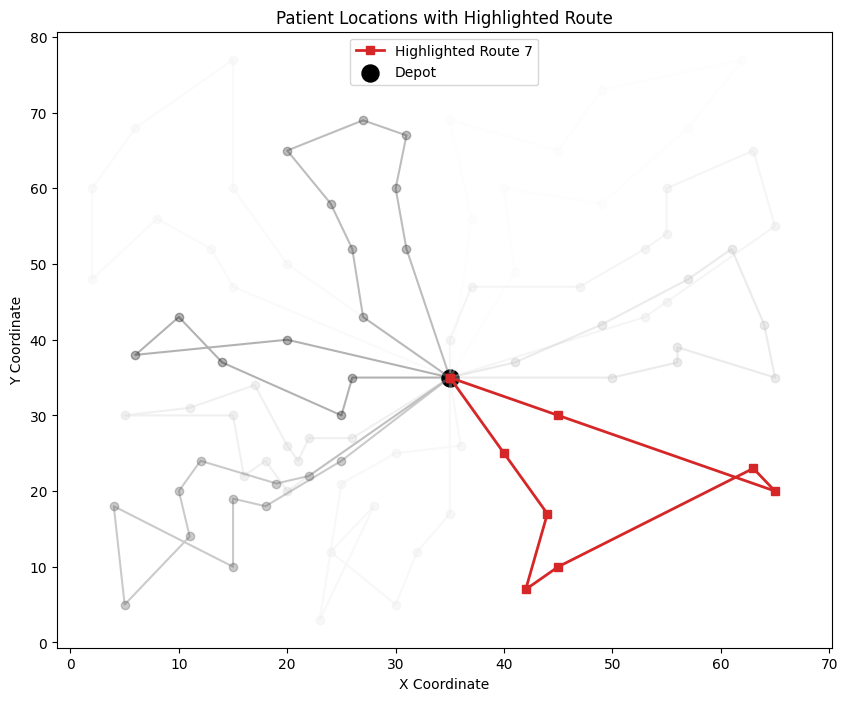

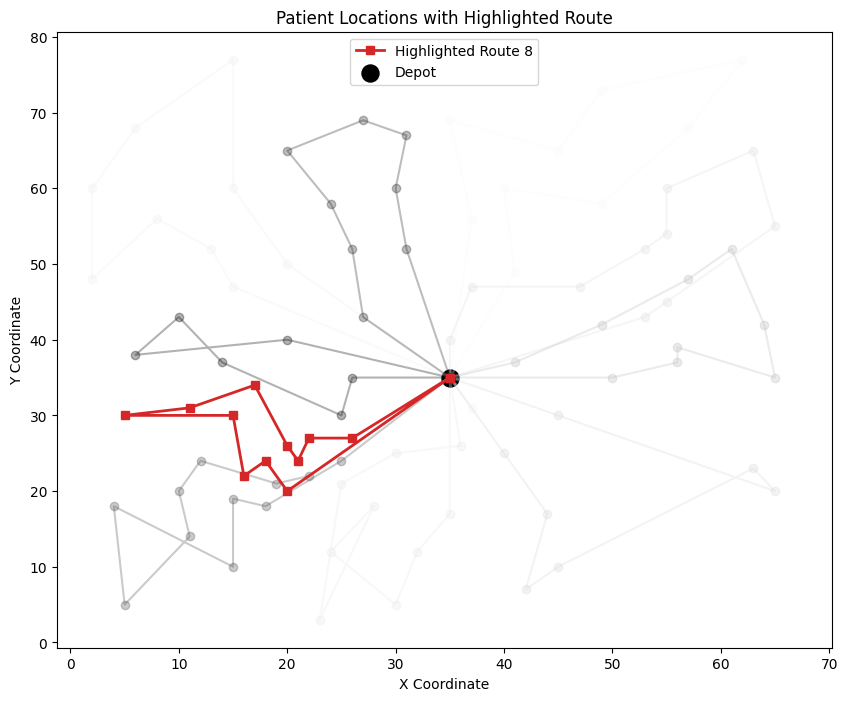

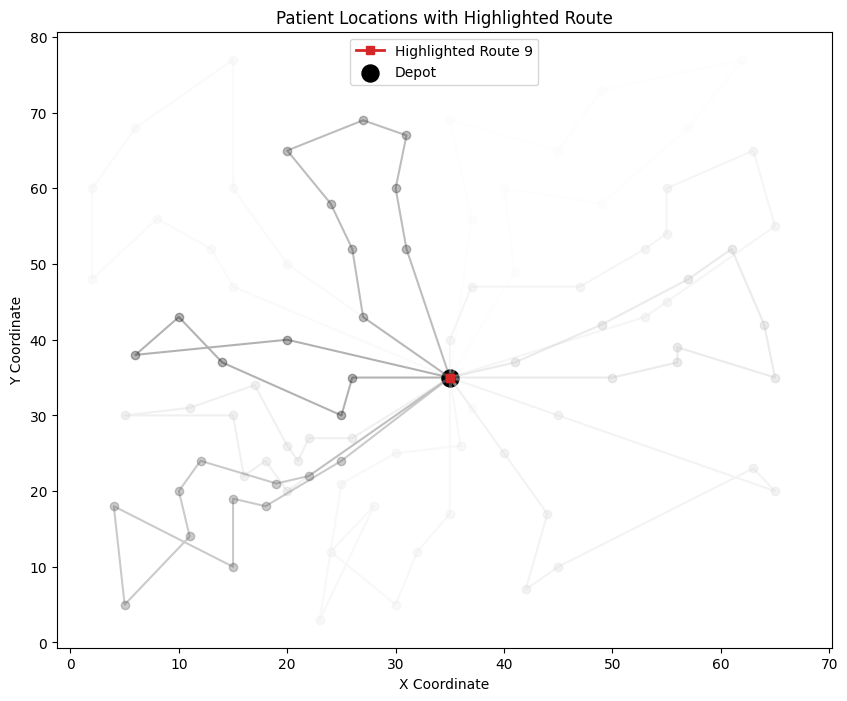

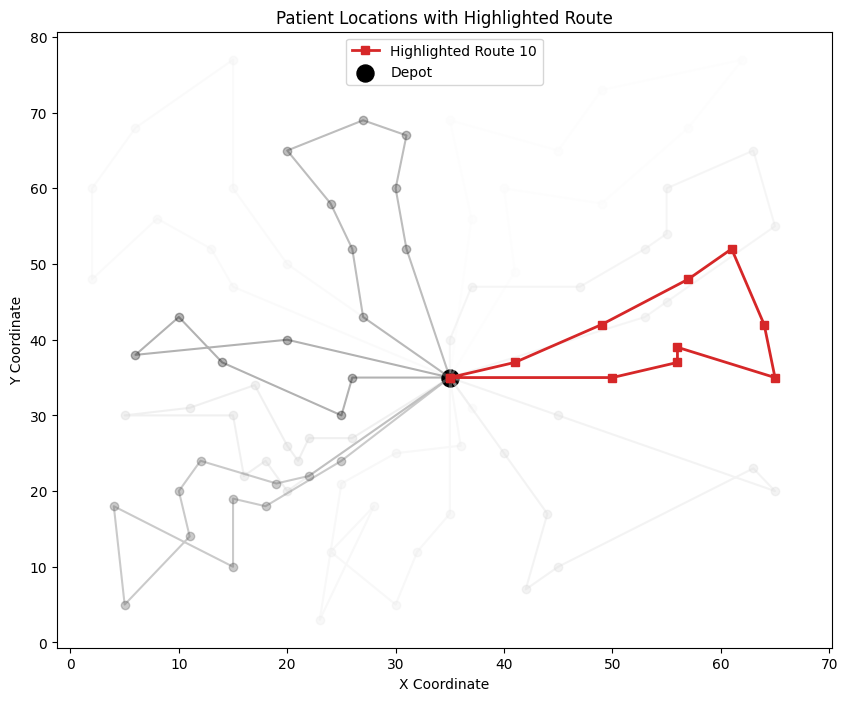

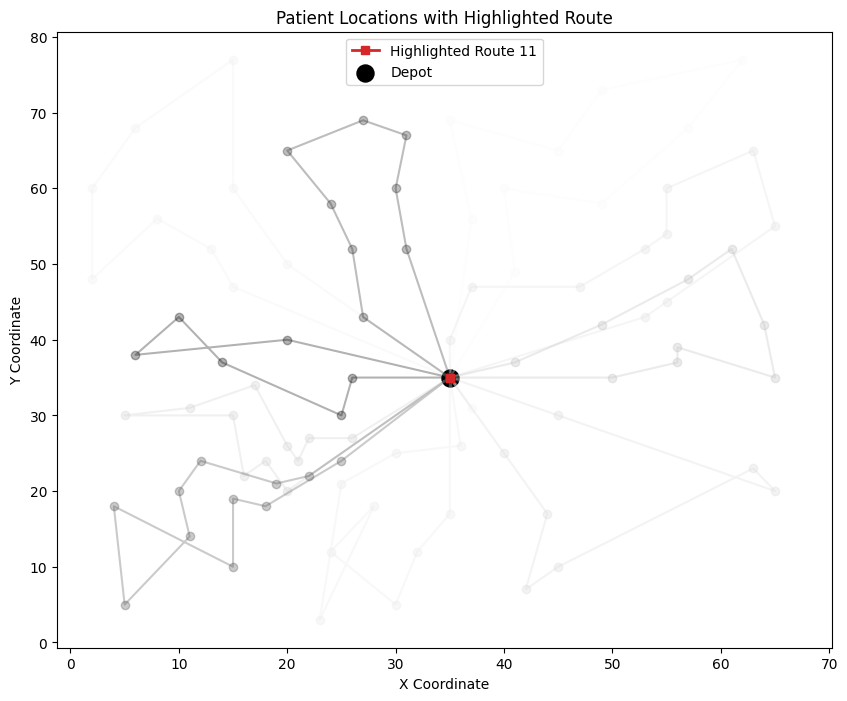

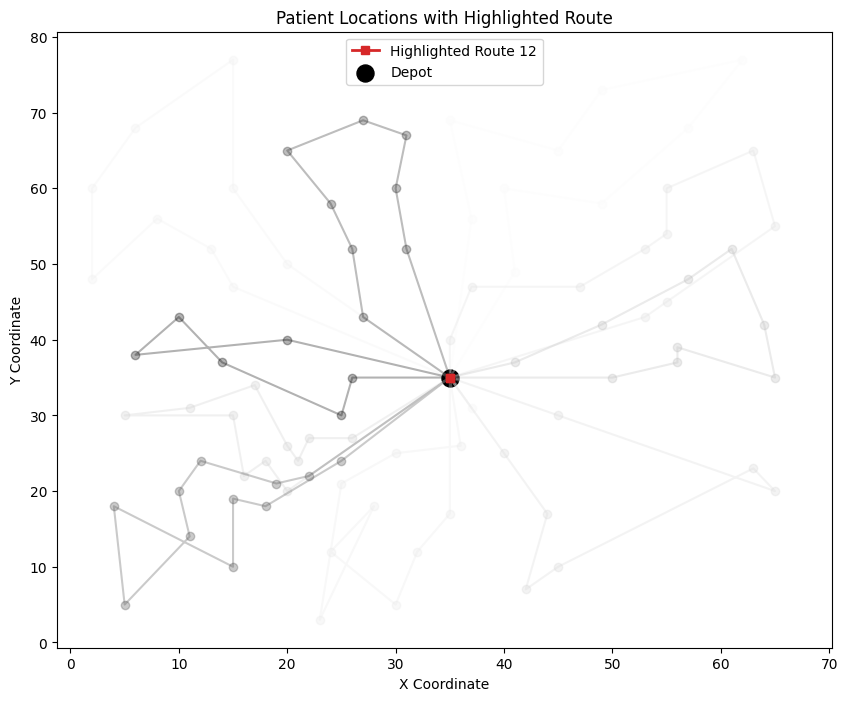

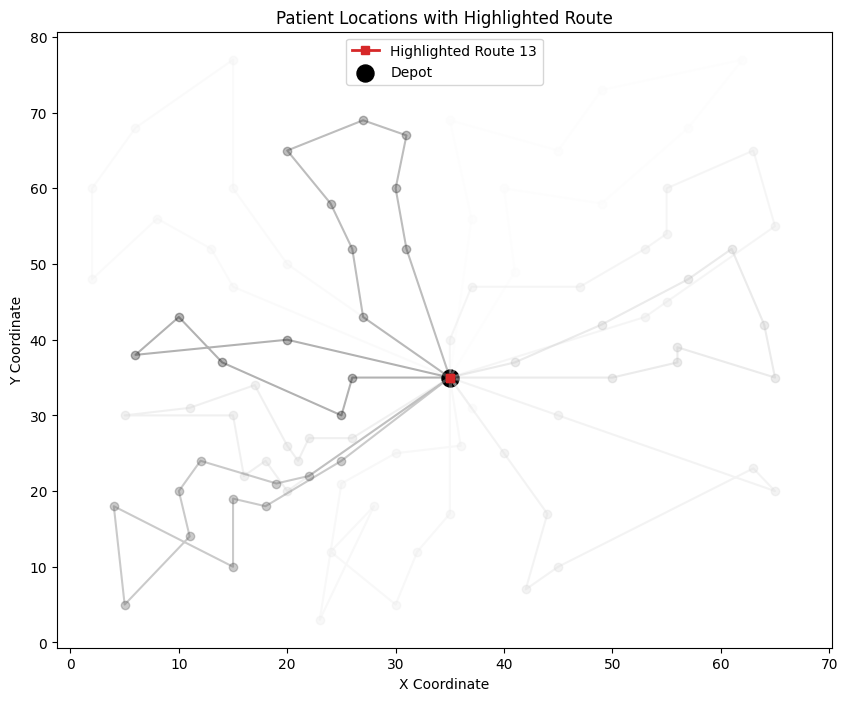

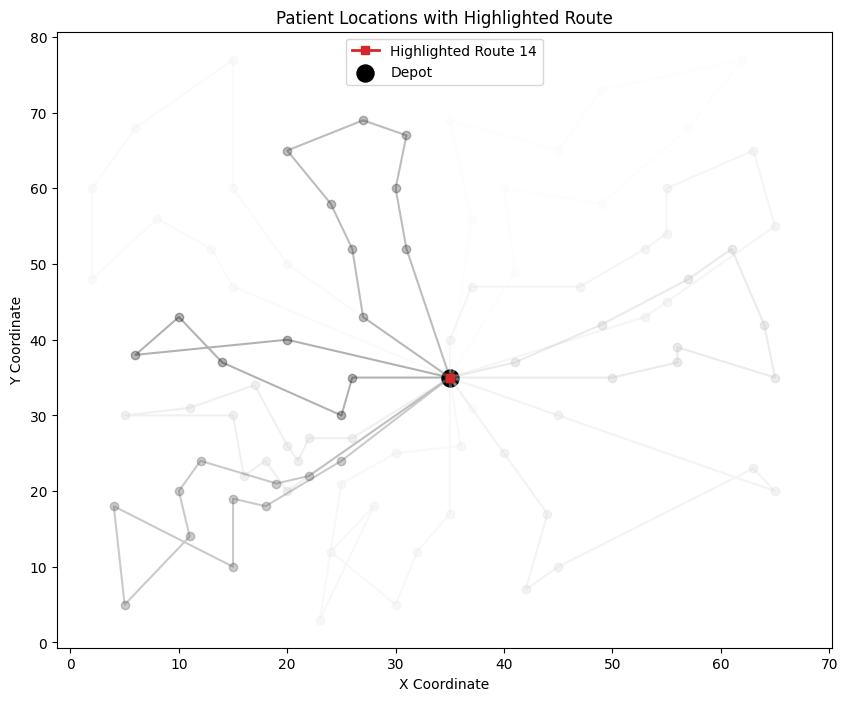

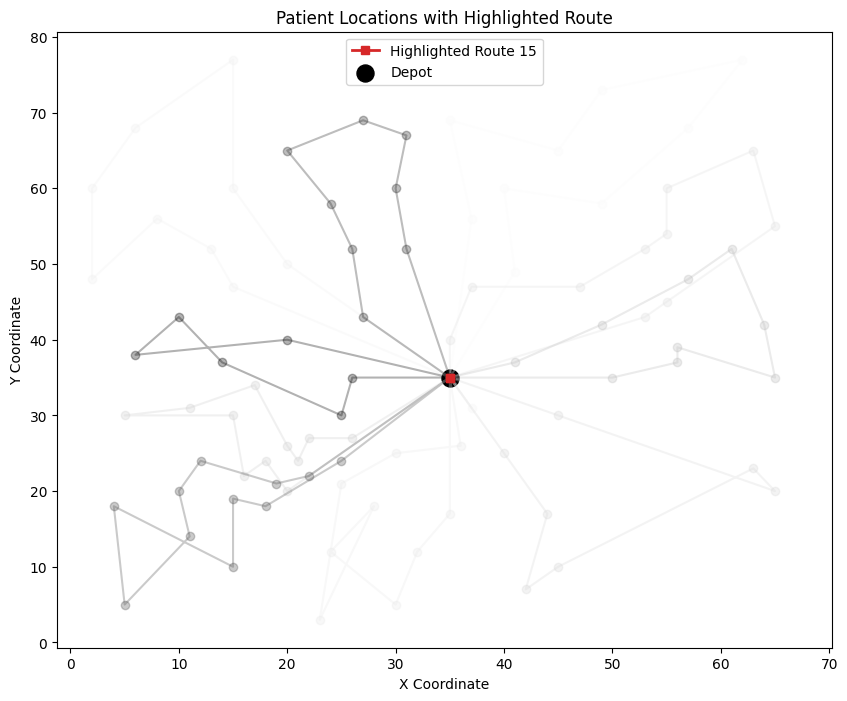

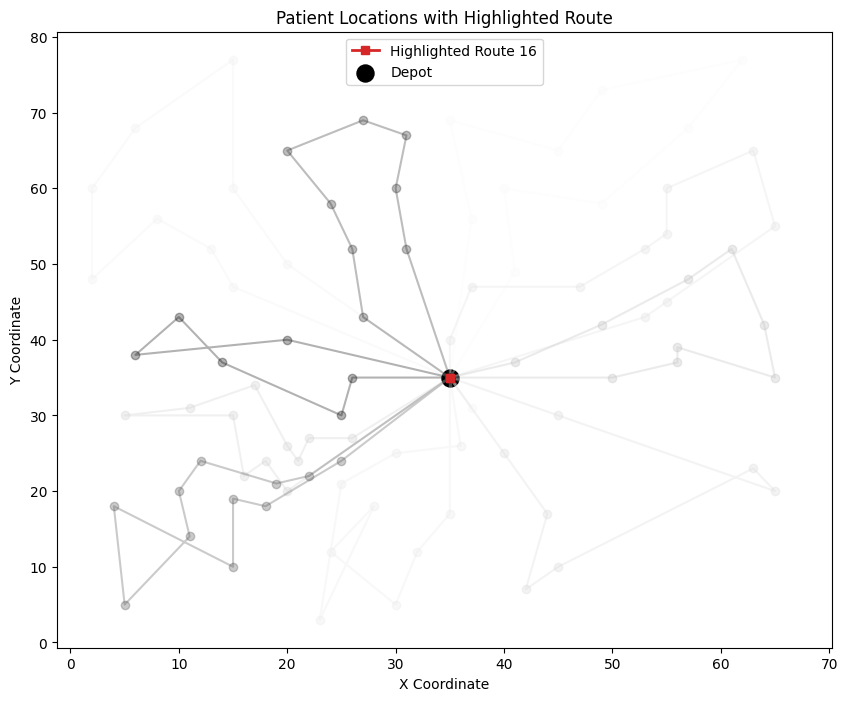

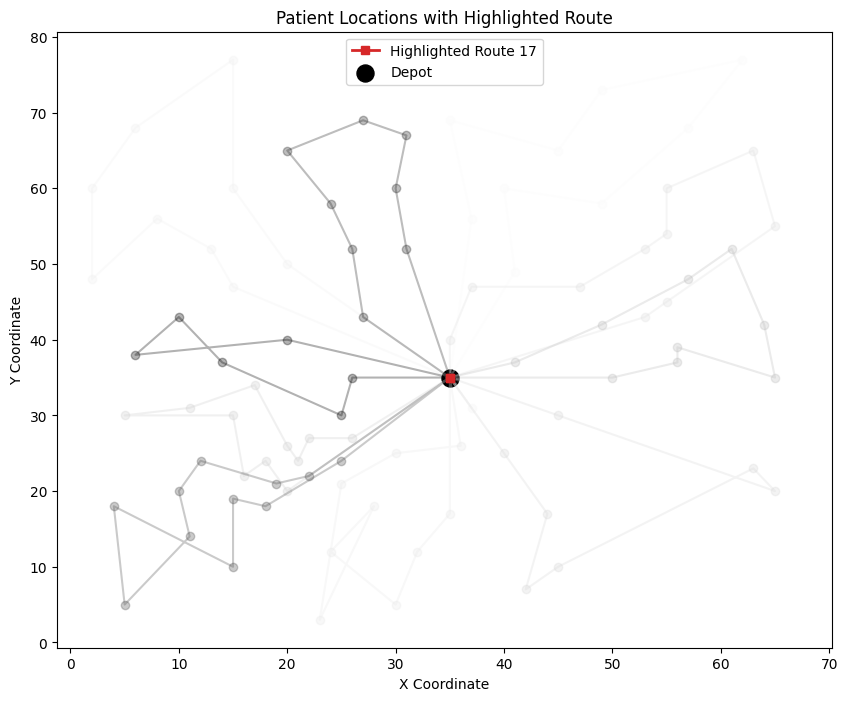

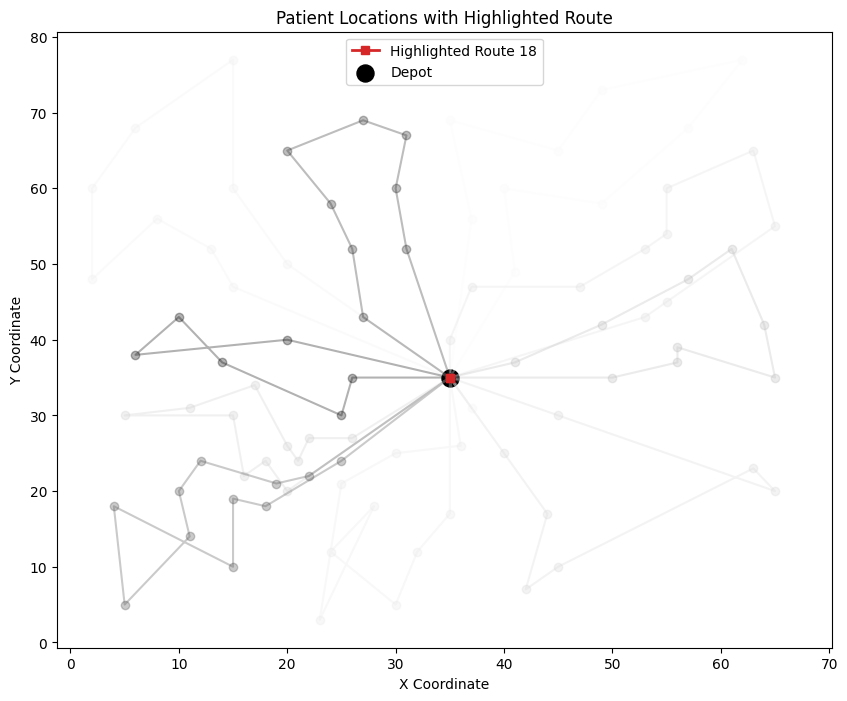

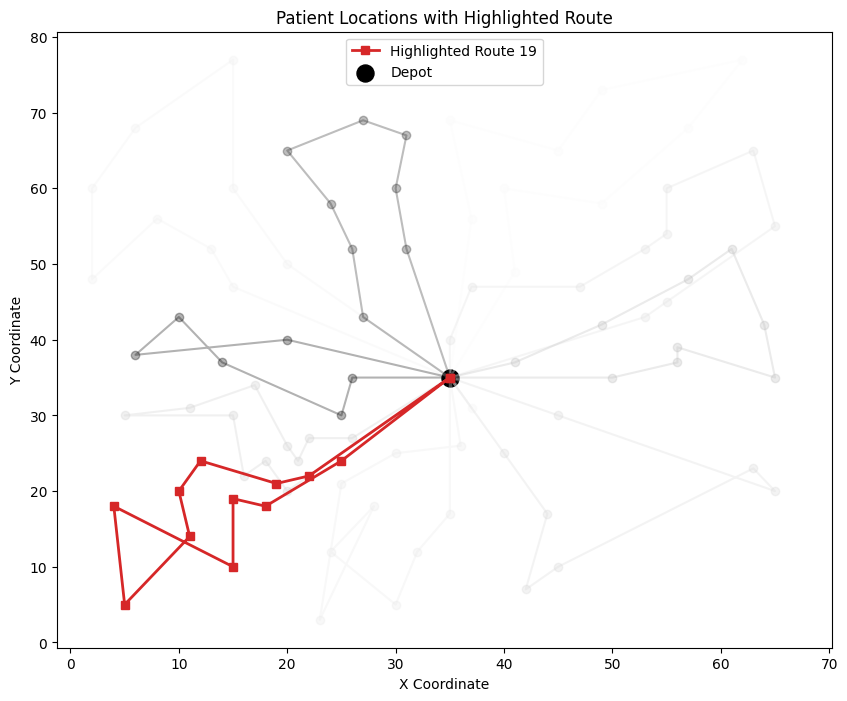

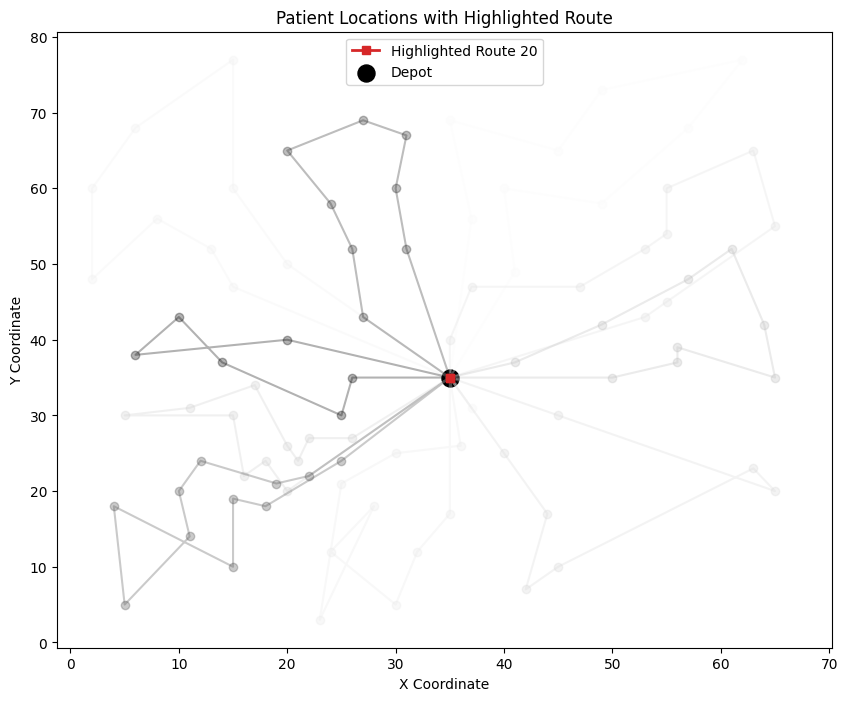

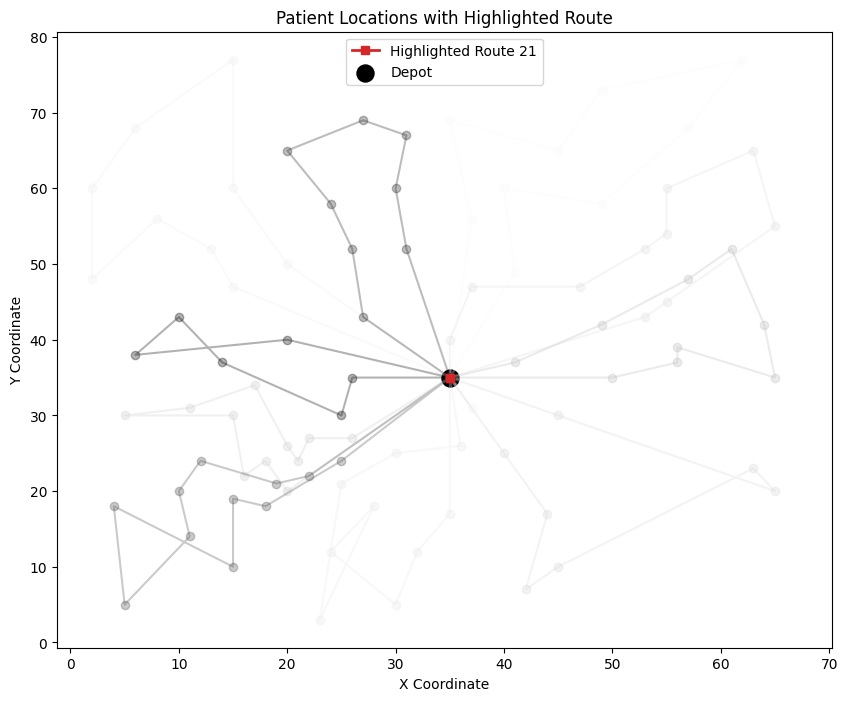

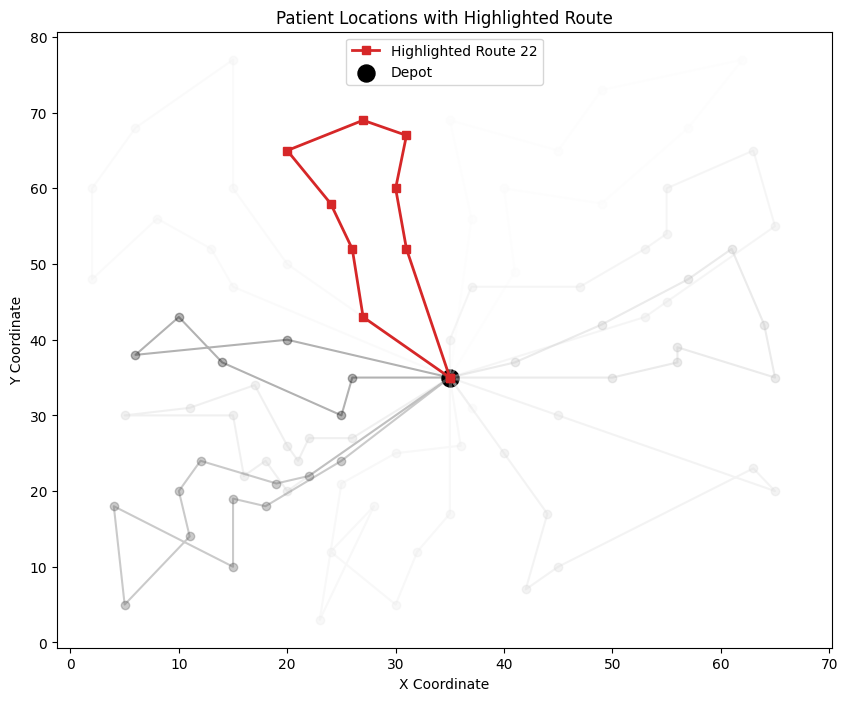

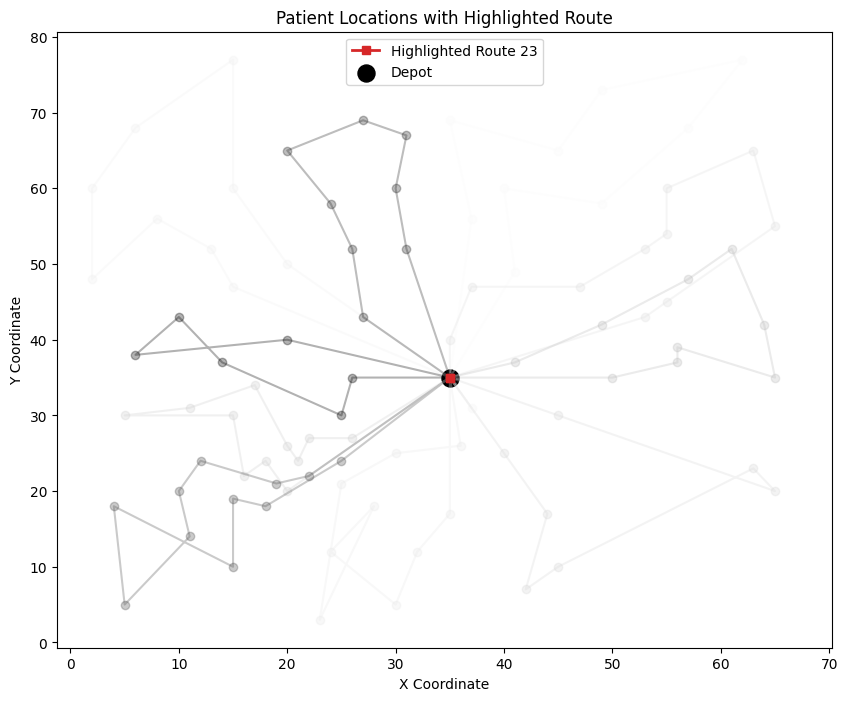

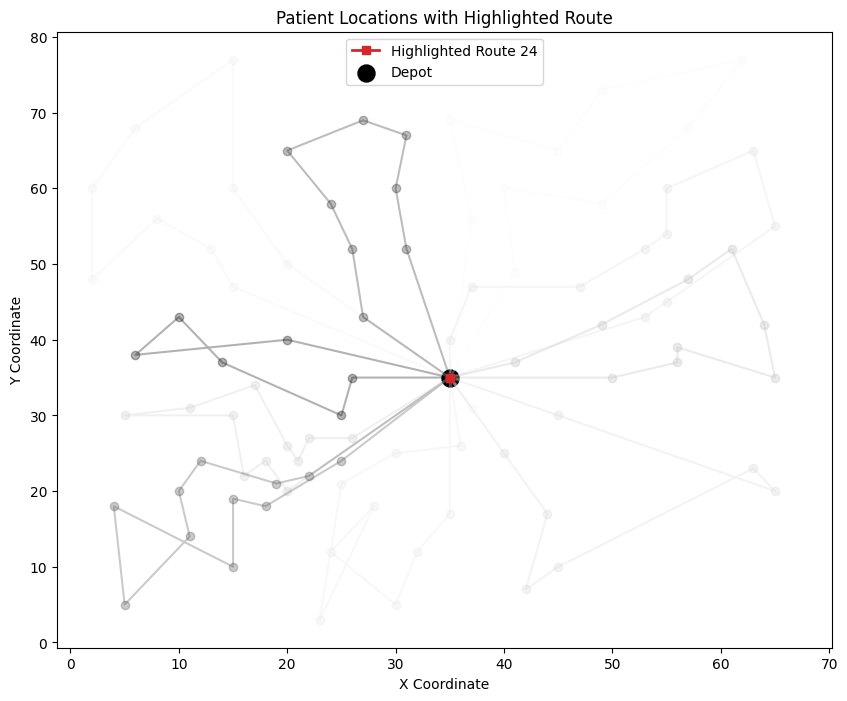

In [10]:
for i in range(1, 25):
    plot_patient_and_depot_locations_all_routes(json_file, i)